In [7]:
import pandas as pd

def merge_tables(paths: List) -> pd.DataFrame:
    """Merge tables from multiple sources into one master table.

    Args:
        paths (List): List of csv files

    Returns:
        pd.DataFrame: Master dataframe
    """
    dfs = []

    for path in paths:
        dfs.append(pd.read_csv(path))

    return pd.concat(dfs)

In [96]:
merged_df = merge_tables(['/content/data-penumpang-kapal-dari-dan-ke-kepulauan-seribu-tahun-2021-bulan-januari.csv',
                          '/content/data-penumpang-kapal-dari-dan-ke-kepulauan-seribu-tahun-2021-bulan-februari.csv',
                          '/content/data-penumpang-kapal-dari-dan-ke-kepulauan-seribu-tahun-2021-bulan-maret.csv',
                          '/content/data-penumpang-kapal-dari-dan-ke-kepulauan-seribu-tahun-2021-bulan-april.csv',
                          '/content/data-penumpang-kapal-dari-dan-ke-kepulauan-seribu-tahun-2021-bulan-mei.csv',
                          '/content/data-penumpang-kapal-dari-dan-ke-kepulauan-seribu-tahun-2021-bulan-juni.csv'])

In [97]:
merged_df['tanggal'] = pd.to_datetime(merged_df['tanggal'])
merged_df['tanggal'] = merged_df['tanggal'].apply(lambda x: x.replace(year = x.year + 1))
merged_df

,tanggal,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
0,2021-01-01,P. MUARA ANGKE,16,19,896,1276
1,2021-01-02,P. MUARA ANGKE,20,16,863,1101
2,2021-01-03,P. MUARA ANGKE,11,15,277,1033
3,2021-01-04,P. MUARA ANGKE,10,6,340,231
4,2021-01-05,P. MUARA ANGKE,6,8,172,204
...,...,...,...,...,...,...
295,2021-06-26,SABIRA,1,1,12,9
296,2021-06-27,SABIRA,1,0,10,0
297,2021-06-28,SABIRA,0,1,0,3
298,2021-06-29,SABIRA,2,0,18,0


In [98]:
df = pd.read_csv('/content/data-penumpang-kapal-dari-dan-ke-kepulauan-seribu-tahun-2021-bulan-juli.csv')
df['tanggal'] = pd.to_datetime(df['tanggal'])
df

,tanggal,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
0,2021-07-01,P. MUARA ANGKE,4,5,54,111
1,2021-07-02,P. MUARA ANGKE,4,4,132,78
2,2021-07-03,P. MUARA ANGKE,6,3,212,47
3,2021-07-04,P. MUARA ANGKE,3,6,35,148
4,2021-07-05,P. MUARA ANGKE,5,3,90,46
...,...,...,...,...,...,...
305,2021-07-27,SABIRA,1,2,17,22
306,2021-07-28,SABIRA,1,0,8,0
307,2021-07-29,SABIRA,0,1,0,4
308,2021-07-30,SABIRA,1,0,5,0


In [99]:
merged_df = pd.concat([merged_df, df])
merged_df

,tanggal,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
0,2021-01-01,P. MUARA ANGKE,16,19,896,1276
1,2021-01-02,P. MUARA ANGKE,20,16,863,1101
2,2021-01-03,P. MUARA ANGKE,11,15,277,1033
3,2021-01-04,P. MUARA ANGKE,10,6,340,231
4,2021-01-05,P. MUARA ANGKE,6,8,172,204
...,...,...,...,...,...,...
305,2021-07-27,SABIRA,1,2,17,22
306,2021-07-28,SABIRA,1,0,8,0
307,2021-07-29,SABIRA,0,1,0,4
308,2021-07-30,SABIRA,1,0,5,0


In [100]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2120 entries, 0 to 309
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tanggal          2120 non-null   datetime64[ns]
 1   pelabuhan        2120 non-null   object        
 2   kapal_berangkat  2120 non-null   int64         
 3   kapal_tiba       2120 non-null   int64         
 4   penumpang_naik   2120 non-null   int64         
 5   penumpang_turun  2120 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 115.9+ KB


In [101]:
merged_df.isnull().sum()

tanggal            0
pelabuhan          0
kapal_berangkat    0
kapal_tiba         0
penumpang_naik     0
penumpang_turun    0
dtype: int64

In [102]:
merged_df['tanggal'].value_counts()

2021-02-17    10
2021-03-03    10
2021-02-20    10
2021-05-10    10
2021-07-28    10
              ..
2021-06-06    10
2021-03-08    10
2021-05-26    10
2021-02-25    10
2021-05-18    10
Name: tanggal, Length: 212, dtype: int64

In [103]:
merged_df = merged_df.groupby(['tanggal','pelabuhan'],as_index=False).agg({'kapal_berangkat':'sum',
                                                                           'kapal_tiba':'sum',
                                                                           'penumpang_naik':'sum',
                                                                           'penumpang_turun':'sum'})

merged_df

,tanggal,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
0,2021-01-01,HARAPAN,6,2,561,18
1,2021-01-01,KELAPA,2,4,101,96
2,2021-01-01,LANCANG,6,6,93,141
3,2021-01-01,MARINA ANCOL,3,2,213,121
4,2021-01-01,P. MUARA ANGKE,16,19,896,1276
...,...,...,...,...,...,...
2115,2021-07-31,PARI,3,3,9,8
2116,2021-07-31,PRAMUKA/PANGGANG,5,8,27,123
2117,2021-07-31,SABIRA,0,0,0,0
2118,2021-07-31,TIDUNG/PAYUNG,4,4,4,11


In [104]:
merged_df['tanggal'].value_counts()

2021-02-17    10
2021-03-03    10
2021-02-20    10
2021-05-10    10
2021-07-28    10
              ..
2021-06-06    10
2021-03-08    10
2021-05-26    10
2021-02-25    10
2021-05-18    10
Name: tanggal, Length: 212, dtype: int64

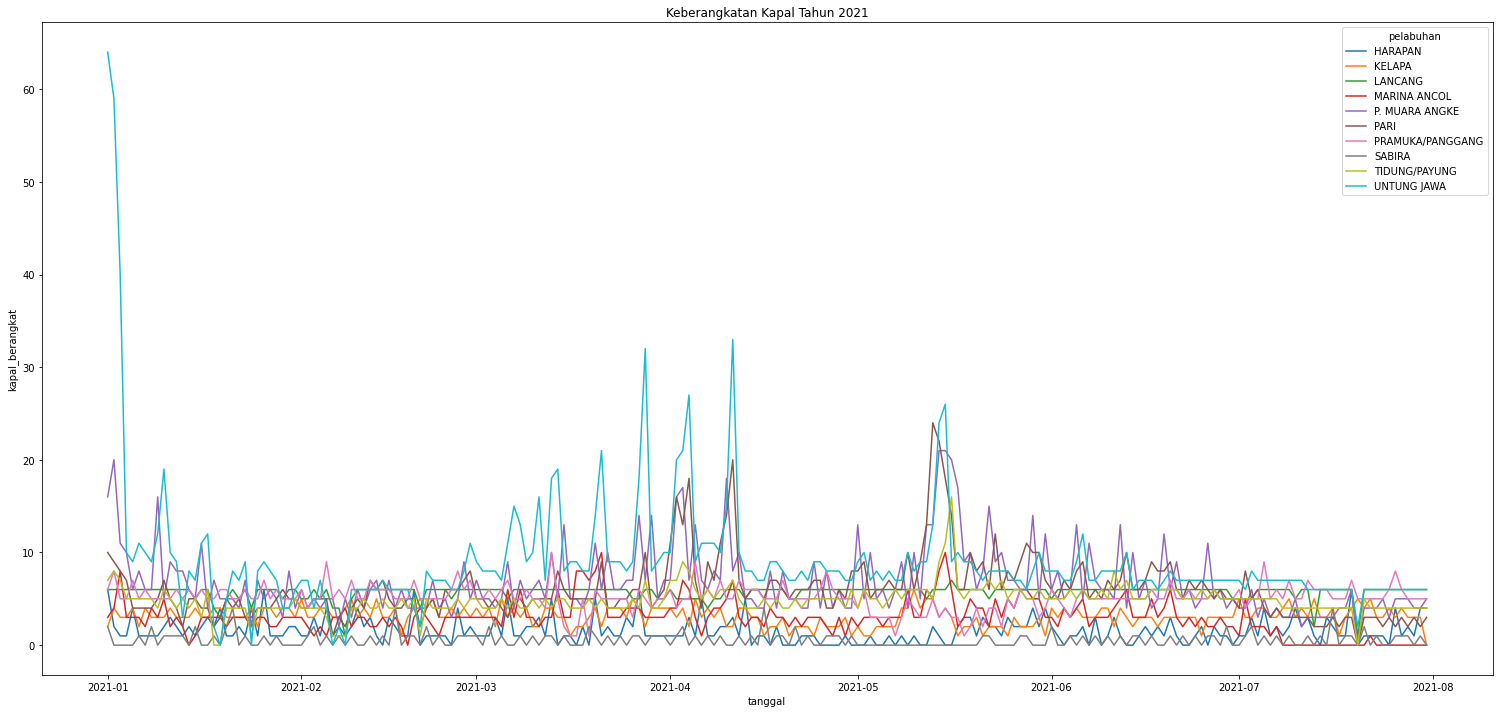

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(26, 12))
sns.lineplot(data=merged_df, x='tanggal', y='kapal_berangkat', hue='pelabuhan')
plt.title('Keberangkatan Kapal Tahun 2021')
plt.show()

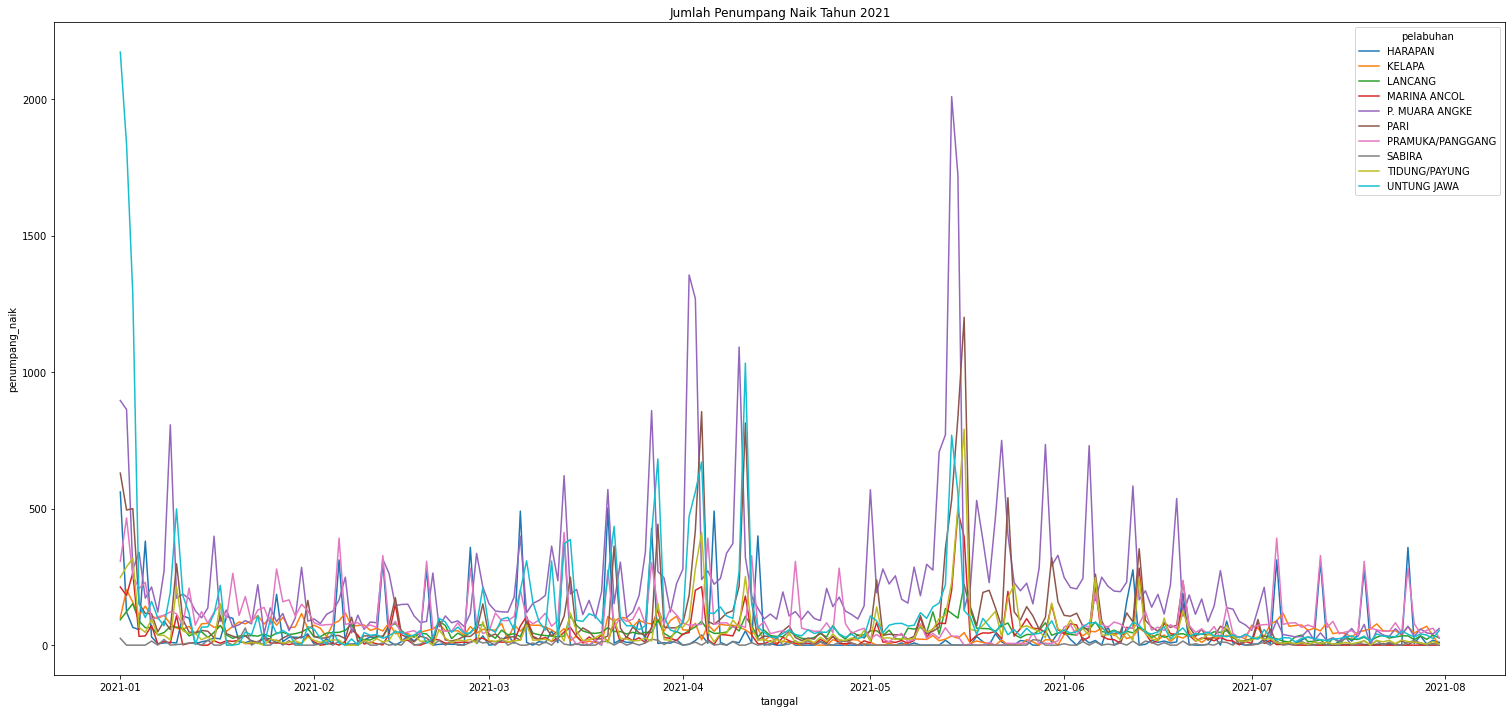

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(26, 12))
sns.lineplot(data=merged_df, x='tanggal', y='penumpang_naik', hue='pelabuhan')
plt.title('Jumlah Penumpang Naik Tahun 2021')
plt.show()

In [112]:
merged_df['penumpang_naik'].quantile(0.99)

734.2399999999998

In [113]:
spike_passengers_df = merged_df[merged_df['penumpang_naik'] > 734]
spike_passengers_df

,tanggal,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
4,2021-01-01,P. MUARA ANGKE,16,19,896,1276
9,2021-01-01,UNTUNG JAWA,64,64,2172,2134
14,2021-01-02,P. MUARA ANGKE,20,16,863,1101
19,2021-01-02,UNTUNG JAWA,59,59,1834,1828
29,2021-01-03,UNTUNG JAWA,40,40,1285,1178
84,2021-01-09,P. MUARA ANGKE,16,5,807,83
854,2021-03-27,P. MUARA ANGKE,14,7,859,200
914,2021-04-02,P. MUARA ANGKE,16,17,1356,261
924,2021-04-03,P. MUARA ANGKE,17,10,1269,628
935,2021-04-04,PARI,18,18,855,330


In [114]:
merged_df.to_csv('data-penumpang-kapal-dari-dan-ke-kepulauan-seribu-tahun-2021-ALL.csv', index=False)

### Script

In [ ]:
import pandas as pd
from typing import List

def merge_tables(paths: List) -> pd.DataFrame:
    """Merge tables from multiple sources into one master table.

    Args:
        paths (List): List of csv files

    Returns:
        pd.DataFrame: Master dataframe
    """
    dfs = []

    for path in paths:
        dfs.append(pd.read_csv(path))

    return pd.concat(dfs)

merged_df = merge_tables(['/content/data-penumpang-kapal-dari-dan-ke-kepulauan-seribu-tahun-2021-bulan-januari.csv',
                          '/content/data-penumpang-kapal-dari-dan-ke-kepulauan-seribu-tahun-2021-bulan-februari.csv',
                          '/content/data-penumpang-kapal-dari-dan-ke-kepulauan-seribu-tahun-2021-bulan-maret.csv',
                          '/content/data-penumpang-kapal-dari-dan-ke-kepulauan-seribu-tahun-2021-bulan-april.csv',
                          '/content/data-penumpang-kapal-dari-dan-ke-kepulauan-seribu-tahun-2021-bulan-mei.csv',
                          '/content/data-penumpang-kapal-dari-dan-ke-kepulauan-seribu-tahun-2021-bulan-juni.csv'])


merged_df['tanggal'] = pd.to_datetime(merged_df['tanggal'])
merged_df['tanggal'] = merged_df['tanggal'].apply(lambda x: x.replace(year = x.year + 1))

df = pd.read_csv('/content/data-penumpang-kapal-dari-dan-ke-kepulauan-seribu-tahun-2021-bulan-juli.csv')
df['tanggal'] = pd.to_datetime(df['tanggal'])

merged_df = pd.concat([merged_df, df])
merged_df = merged_df.groupby(['tanggal','pelabuhan'],as_index=False).agg({'kapal_berangkat':'sum',
                                                                           'kapal_tiba':'sum',
                                                                           'penumpang_naik':'sum',
                                                                           'penumpang_turun':'sum'})